In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Online+Retail.csv',encoding = 'ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [27]:
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
484463,577531,47591d,PINK FAIRY CAKE CHILDRENS APRON,1,20-11-2011 13:58,4.96,NaN,United Kingdom
452645,575367,23382,BOX OF 6 CHRISTMAS CAKE DECORATIONS,4,09-11-2011 15:05,3.75,15114.0,United Kingdom
494761,578272,23323,WHITE WICKER STAR,6,23-11-2011 13:40,2.10,17463.0,United Kingdom
479620,577172,21731,RED TOADSTOOL LED NIGHT LIGHT,6,18-11-2011 10:56,1.65,17760.0,United Kingdom
535846,581217,23292,SPACEBOY CHILDRENS CUP,2,08-12-2011 09:20,2.46,NaN,United Kingdom


In [9]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Calculating the missing values in each column

In [10]:
data.isnull().sum()/data.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

Remove the missing values row wise

In [11]:
data.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [8]:
data.dropna().isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Check whether the values removed are not

In [12]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
new_df = data.dropna()
new_df.shape

(406829, 8)

In [22]:
new_df.isnull().sum().sum()

0

In [23]:
data.InvoiceDate.dtype

dtype('O')

In [19]:
new_df.InvoiceDate.head()

0    01-12-2010 08:26
1    01-12-2010 08:26
2    01-12-2010 08:26
3    01-12-2010 08:26
4    01-12-2010 08:26
Name: InvoiceDate, dtype: object

In [25]:
new_df.InvoiceDate = pd.to_datetime(new_df.InvoiceDate,
                                    format = '%d-%m-%Y %H:%M')
new_df.InvoiceDate[:5]

C:\Users\Mouni\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [28]:
new_df['Total'] = new_df['Quantity'] * new_df['UnitPrice']
new_df.head(1)

C:\Users\Mouni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [29]:
new_df['CustomerID'].nunique()

4372

In [30]:
new_df.groupby(['CustomerID'])['Total'].sum()

CustomerID
12346.0    0.000000e+00
12347.0    4.310000e+03
12348.0    1.797240e+03
12349.0    1.757550e+03
12350.0    3.344000e+02
12352.0    1.545410e+03
12353.0    8.900000e+01
12354.0    1.079400e+03
12355.0    4.594000e+02
12356.0    2.811430e+03
12357.0    6.207670e+03
12358.0    1.168060e+03
12359.0    6.245530e+03
12360.0    2.662060e+03
12361.0    1.899000e+02
12362.0    5.154580e+03
12363.0    5.520000e+02
12364.0    1.313100e+03
12365.0    3.206900e+02
12367.0    1.689000e+02
12370.0    3.545690e+03
12371.0    1.887960e+03
12372.0    1.298040e+03
12373.0    3.646000e+02
12374.0    7.429300e+02
12375.0    4.554200e+02
12377.0    1.628120e+03
12378.0    4.008620e+03
12379.0    8.502900e+02
12380.0    2.720560e+03
               ...     
18245.0    2.507560e+03
18246.0    5.961000e+02
18248.0    7.830200e+02
18249.0    9.534000e+01
18250.0    3.429200e+02
18251.0    4.314720e+03
18252.0    5.266700e+02
18255.0    1.033000e+02
18256.0   -5.010000e+01
18257.0    2.265380e+03
18259

In [48]:
monetary = new_df.groupby(['CustomerID'])['Total'].\
                                sum().reset_index()

In [32]:
new_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total'],
      dtype='object')

In [33]:
new_df.groupby(['CustomerID'])['InvoiceNo'].count()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
12352.0     95
12353.0      4
12354.0     58
12355.0     13
12356.0     59
12357.0    131
12358.0     19
12359.0    254
12360.0    129
12361.0     10
12362.0    274
12363.0     23
12364.0     85
12365.0     23
12367.0     11
12370.0    167
12371.0     63
12372.0     52
12373.0     14
12374.0     33
12375.0     18
12377.0     77
12378.0    219
12379.0     41
12380.0    105
          ... 
18245.0    177
18246.0      4
18248.0     49
18249.0      8
18250.0     22
18251.0     16
18252.0     98
18255.0      6
18256.0      4
18257.0    123
18259.0     42
18260.0    140
18261.0     21
18262.0     13
18263.0     62
18265.0     46
18268.0      2
18269.0      8
18270.0     13
18272.0    170
18273.0      3
18274.0     22
18276.0     16
18277.0      9
18278.0      9
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4372, dtype: int64

In [35]:
frequency = new_df.groupby(['CustomerID'])['InvoiceNo'].count().\
                                                reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [36]:
new_df.groupby(['CustomerID'])['InvoiceDate'].max()

CustomerID
12346.0   2011-01-18 10:17:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
12352.0   2011-11-03 14:37:00
12353.0   2011-05-19 17:47:00
12354.0   2011-04-21 13:11:00
12355.0   2011-05-09 13:49:00
12356.0   2011-11-17 08:40:00
12357.0   2011-11-06 16:07:00
12358.0   2011-12-08 10:26:00
12359.0   2011-12-02 11:21:00
12360.0   2011-10-18 15:22:00
12361.0   2011-02-25 13:51:00
12362.0   2011-12-06 15:40:00
12363.0   2011-08-22 10:18:00
12364.0   2011-12-02 10:22:00
12365.0   2011-02-21 14:04:00
12367.0   2011-12-05 16:48:00
12370.0   2011-10-19 14:51:00
12371.0   2011-10-26 10:16:00
12372.0   2011-09-29 12:12:00
12373.0   2011-02-01 13:10:00
12374.0   2011-11-14 15:37:00
12375.0   2011-12-07 11:27:00
12377.0   2011-01-28 15:45:00
12378.0   2011-08-02 10:34:00
12379.0   2011-09-19 10:09:00
12380.0   2011-11-18 11:27:00
                  ...        
18245.0   2011-12-02 14:48:00
18246.0   2011-11-16 11:49:00

In [37]:
new_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [38]:
new_df['Diff'] = new_df['InvoiceDate'].max()-new_df['InvoiceDate']
new_df['Diff'][:5]

C:\Users\Mouni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0   373 days 04:24:00
1   373 days 04:24:00
2   373 days 04:24:00
3   373 days 04:24:00
4   373 days 04:24:00
Name: Diff, dtype: timedelta64[ns]

In [39]:
new_df.groupby(['CustomerID'])['Diff'].min()

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
12352.0    35 days 22:13:00
12353.0   203 days 19:03:00
12354.0   231 days 23:39:00
12355.0   213 days 23:01:00
12356.0    22 days 04:10:00
12357.0    32 days 20:43:00
12358.0     1 days 02:24:00
12359.0     7 days 01:29:00
12360.0    51 days 21:28:00
12361.0   286 days 22:59:00
12362.0     2 days 21:10:00
12363.0   109 days 02:32:00
12364.0     7 days 02:28:00
12365.0   290 days 22:46:00
12367.0     3 days 20:02:00
12370.0    50 days 21:59:00
12371.0    44 days 02:34:00
12372.0    71 days 00:38:00
12373.0   310 days 23:40:00
12374.0    24 days 21:13:00
12375.0     2 days 01:23:00
12377.0   314 days 21:05:00
12378.0   129 days 02:16:00
12379.0    81 days 02:41:00
12380.0    21 days 01:23:00
                 ...       
18245.0     6 days 22:02:00
18246.0    23 days 01:01:00
18248.0   113 days 06:36:00
18249.0    16 days 21:43:00
18250.0  

In [41]:
Recency = new_df.groupby(['CustomerID'])['Diff'].min().reset_index()

In [49]:
print(Recency.shape)
print(monetary.shape)
print(frequency.shape)

(4372, 2)
(4372, 2)
(4372, 2)


In [50]:
rfm = pd.merge(Recency,monetary,on='CustomerID')
rfm = pd.merge(rfm,frequency,on='CustomerID')
rfm.head()

,CustomerID,Diff,Total,InvoiceNo
0,12346.0,325 days 02:33:00,0.00,2
1,12347.0,1 days 20:58:00,4310.00,182
2,12348.0,74 days 23:37:00,1797.24,31
3,12349.0,18 days 02:59:00,1757.55,73
4,12350.0,309 days 20:49:00,334.40,17


In [51]:
rfm = rfm.set_index('CustomerID')
rfm.head()

,Diff,Total,InvoiceNo
CustomerID,,,
12346.0,325 days 02:33:00,0.00,2
12347.0,1 days 20:58:00,4310.00,182
12348.0,74 days 23:37:00,1797.24,31
12349.0,18 days 02:59:00,1757.55,73
12350.0,309 days 20:49:00,334.40,17


In [52]:
rfm.columns =['Recency','Monetary','Frequency']
rfm.head()

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,325 days 02:33:00,0.00,2
12347.0,1 days 20:58:00,4310.00,182
12348.0,74 days 23:37:00,1797.24,31
12349.0,18 days 02:59:00,1757.55,73
12350.0,309 days 20:49:00,334.40,17


In [58]:
rfm.Recency.dt.days

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
12352.0     35
12353.0    203
12354.0    231
12355.0    213
12356.0     22
12357.0     32
12358.0      1
12359.0      7
12360.0     51
12361.0    286
12362.0      2
12363.0    109
12364.0      7
12365.0    290
12367.0      3
12370.0     50
12371.0     44
12372.0     71
12373.0    310
12374.0     24
12375.0      2
12377.0    314
12378.0    129
12379.0     81
12380.0     21
          ... 
18245.0      6
18246.0     23
18248.0    113
18249.0     16
18250.0    300
18251.0     86
18252.0     50
18255.0     88
18256.0    354
18257.0     38
18259.0     24
18260.0    172
18261.0     42
18262.0    139
18263.0     22
18265.0     71
18268.0    133
18269.0    357
18270.0     37
18272.0      2
18273.0      1
18274.0     17
18276.0     20
18277.0     57
18278.0     73
18280.0    277
18281.0    180
18282.0      7
18283.0      3
18287.0     42
Name: Recency, Length: 4372, dtype: int64

In [59]:
rfm.Recency

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
12352.0    35 days 22:13:00
12353.0   203 days 19:03:00
12354.0   231 days 23:39:00
12355.0   213 days 23:01:00
12356.0    22 days 04:10:00
12357.0    32 days 20:43:00
12358.0     1 days 02:24:00
12359.0     7 days 01:29:00
12360.0    51 days 21:28:00
12361.0   286 days 22:59:00
12362.0     2 days 21:10:00
12363.0   109 days 02:32:00
12364.0     7 days 02:28:00
12365.0   290 days 22:46:00
12367.0     3 days 20:02:00
12370.0    50 days 21:59:00
12371.0    44 days 02:34:00
12372.0    71 days 00:38:00
12373.0   310 days 23:40:00
12374.0    24 days 21:13:00
12375.0     2 days 01:23:00
12377.0   314 days 21:05:00
12378.0   129 days 02:16:00
12379.0    81 days 02:41:00
12380.0    21 days 01:23:00
                 ...       
18245.0     6 days 22:02:00
18246.0    23 days 01:01:00
18248.0   113 days 06:36:00
18249.0    16 days 21:43:00
18250.0  

In [60]:
rfm.Recency = rfm.Recency.dt.days + 1
rfm.head()

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,326,0.00,2
12347.0,2,4310.00,182
12348.0,75,1797.24,31
12349.0,19,1757.55,73
12350.0,310,334.40,17


In [62]:
from sklearn.cluster import KMeans
km = KMeans(5)
km.fit(rfm)
km.labels_[78:1000]

array([0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       4, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0,
       4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
km.inertia_

18026053423.067516

In [64]:
k = {}
for i in range(2,20):
    km = KMeans(i)
    km.fit(rfm)
    k[i] = km.inertia_
k
    

{2: 100276002377.65213,
 3: 49416891560.66791,
 4: 30433053447.959854,
 5: 18026239859.90112,
 6: 11821104541.654345,
 7: 8610259228.30716,
 8: 5663724519.866535,
 9: 4237266078.358245,
 10: 3290680601.1288385,
 11: 2570650517.0120697,
 12: 2112867139.4758275,
 13: 1847592433.397527,
 14: 1637266911.6143677,
 15: 1426756487.5214097,
 16: 1234756348.1001344,
 17: 1070962543.5082798,
 18: 941924998.0727727,
 19: 815497974.7853285}

([<matplotlib.axis.XTick at 0x1ba1b67dc18>,
 <a list of 18 Text xticklabel objects>)

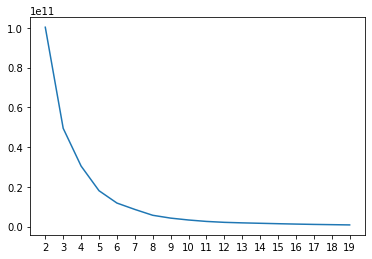

In [78]:
plt.plot(list(k.keys()),list(k.values()))
plt.xticks(list(range(2,20,1)))